In [22]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import * 

# Loading your IBM Q account(s)
provider = IBMQ.load_account()
from qiskit_textbook.tools import simon_oracle

ibmqfactory.load_account:WARNING:2021-04-09 06:41:36,287: Credentials are already in use. The existing account in the session will be replaced.


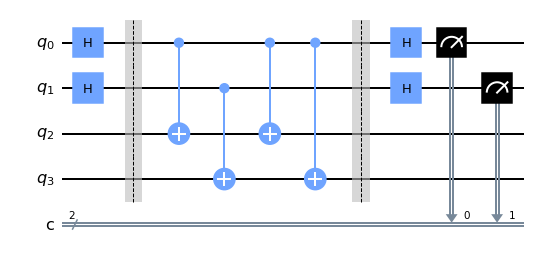

In [23]:
b='11'
n=len(b)

simon_ckt = QuantumCircuit(n*2,n)  #2n qubits and n classical bits
#applying hadamard
simon_ckt.h(range(n))
simon_ckt.barrier()
simon_ckt +=simon_oracle(b)
simon_ckt.barrier()
simon_ckt.h(range(n))
simon_ckt.measure(range(n),range(n))
simon_ckt.draw('mpl')

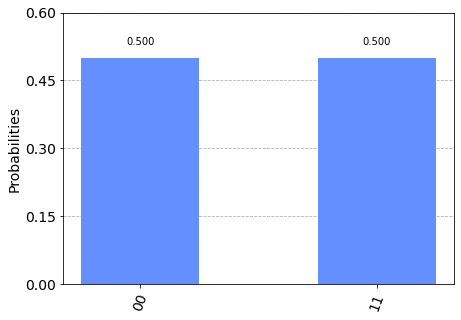

In [24]:
#local simulator

qasm_sim = Aer.get_backend('qasm_simulator')
shots = 10
qobj = assemble(simon_ckt,shots = shots)

results = qasm_sim.run(qobj).result()
counts  = results.get_counts()
plot_histogram(counts)

In [25]:
def dot(b,z):
    a = 0
    for i in range(len(b)):
        a += (int(b[i]) * int(z[i]))
    return(a%2)


In [27]:
for z in counts:
    print("{}.{} = {} (mod2)".format(b,z,dot(b,z)))


11.11 = 0 (mod2)
11.00 = 0 (mod2)


In [28]:
from qiskit.providers.ibmq import least_busy

#Loading your ibmq accounts
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits>=(n+1)and not x.configuration().simulator and x.status().operational == True))
print("Least busy backend:",backend)

ibmqfactory.load_account:WARNING:2021-04-09 06:56:06,040: Credentials are already in use. The existing account in the session will be replaced.


Least busy backend: ibmq_belem


In [30]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_simon_ckt = transpile(simon_ckt,backend,optimization_level=3)
job = backend.run(assemble(transpiled_simon_ckt,backend))
job_monitor(job,interval = 2)

<ipython-input-30-f8f1bbcaa604>:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(assemble(transpiled_simon_ckt,backend))


Job Status: job has successfully run


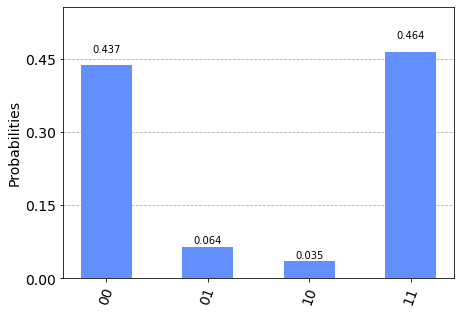

In [31]:
#getting the results of computation
results = job.result()
ans = results.get_counts()
plot_histogram(ans)